In [21]:
postgres_accs = [[0.9875,
  0.9925,
  0.965,
  0.9775,
  0.985,
  0.965,
  0.98,
  0.9875,
  0.985,
  0.995,
  0.9875,
  0.9925],
 [0.9675,
  0.9375,
  0.9725,
  0.9675,
  0.955,
  0.9475,
  0.9425,
  0.9575,
  0.9675,
  0.9425,
  0.945,
  0.9675],
 [0.9925,
  0.995,
  0.9925,
  0.99,
  0.99,
  0.9875,
  0.995,
  0.995,
  0.9925,
  0.995,
  0.99,
  0.995],
 [0.97,
  0.98,
  0.96,
  0.98,
  0.9625,
  0.97,
  0.97,
  0.9875,
  0.9625,
  0.96,
  0.96,
  0.96],
 [0.995,
  0.995,
  0.9875,
  0.995,
  0.985,
  0.9875,
  0.995,
  1.0,
  0.99,
  0.995,
  0.99,
  0.995],
 [0.9,
  0.895,
  0.9325,
  0.9275,
  0.8625,
  0.925,
  0.8925,
  0.9425,
  0.955,
  0.9525,
  0.955,
  0.9475],
 [0.8475,
  0.87,
  0.88,
  0.8075,
  0.795,
  0.9075,
  0.84,
  0.9175,
  0.8425,
  0.84,
  0.8425,
  0.845],
 [0.93,
  0.875,
  0.94,
  0.95,
  0.85,
  0.97,
  0.8525,
  0.9575,
  0.9375,
  0.9475,
  0.95,
  0.9375]]

In [22]:
mssql_accs = [[0.9775,
  0.9675,
  0.8675,
  0.83,
  0.98,
  0.9875,
  0.9825,
  0.9525,
  0.9925,
  0.9925,
  0.995,
  0.995],
 [0.9775,
  0.98,
  0.855,
  0.8175,
  0.9175,
  0.9775,
  0.945,
  0.97,
  0.9825,
  0.975,
  0.9875,
  0.9825],
 [0.99,
  0.9825,
  0.8925,
  0.85,
  0.9825,
  0.9825,
  0.9775,
  0.97,
  0.99,
  0.9875,
  1.0,
  1.0],
 [0.9925,
  0.9775,
  0.875,
  0.835,
  0.945,
  0.9875,
  0.98,
  0.965,
  0.99,
  0.955,
  0.985,
  0.9975],
 [0.9975,
  0.98,
  0.8925,
  0.85,
  0.985,
  0.9825,
  0.99,
  0.9675,
  0.9925,
  0.9925,
  1.0,
  1.0],
 [0.9225,
  0.8875,
  0.805,
  0.75,
  0.3525,
  0.975,
  0.895,
  0.865,
  0.88,
  0.86,
  0.94,
  0.9325],
 [0.665,
  0.9325,
  0.78,
  0.5975,
  0.0375,
  0.975,
  0.835,
  0.91,
  0.6925,
  0.7825,
  0.9,
  0.94],
 [0.95,
  0.925,
  0.8225,
  0.8075,
  0.015,
  0.975,
  0.8975,
  0.9475,
  0.9825,
  0.955,
  0.99,
  0.9875]]

In [29]:
from core.DataLoader import *
from core.models.MLP import * 
from core.models.GAM import *
from core.models.SVM import *
# from core.models.EBM import *

from core.models.RandomForest import *
from core.Visualizer import *
from core.models.Classifier import *
from core.models.XGB import *

In [30]:
model_accs = {
    'MLP': [],
    'RF(5)': [],
    'RF(10)': [],
    'RF(U)': [],
    'DT(5)': [],
    'DT(10)': [],
    'DT(U)': [],
    'LR': [],
    'SVM': [],
    'XGB': []
}
present_idxs = [0, 1, 2, 3, 4, 5, 8 ,12, 21, 22, 23, 24]
# present_idxs = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11 ,12, 13, 21, 22, 23, 24]

In [31]:
weighted_clf_model_list ={
    "MLP": MLPClassifier,
    "DT": m_DecisionTreeClassifier,
    "RF": m_RandomForestClassifier,
    "LR": m_LogisticRegression,
    "SVM": SVMClassifier,
    "XGB": XGBOOSTClassifier
}
# weighted_clf_model_name_list = ['MLP', 'RF(5)', 'RF(U)', 'DT(5)', 'DT(U)', 'LR', 'SVM', 'XGB']
weighted_clf_model_name_list = ['RF(5)', 'DT(5)']
# weighted_clf_model_name_list = ['RF(5)', 'DT(5)']

In [32]:
engine = 'postgres'
# if engine == 'mssql':
#     baseline = mssql_accs
# else:
#     baseline = postgres_accs
dl = DataLoader(engine)
one_file_dss, one_file_names = dl.get_one_file_ds(return_type='ds and names', datasets=['ssb', 'tpch', 'imdb'])

In [33]:
all_features = dl.all_features
classification_target = dl.classification_target

# key_feature_set = 0
# features = key_features[key_feature_set]
# print("Using features: ", features)

In [34]:
all_features

['left_cardinality',
 'base_cardinality',
 'sel_of_pred_on_indexed_attr',
 'sel_of_pred_on_non_indexed_attr',
 'sel_of_pred_on_indexed_attr_and_join_pred',
 'sel_of_pred_on_non_indexed_attr_and_join_pred',
 'sel_of_pred_on_indexed_attr_and_non_indexed_attr',
 'total_sel_on_base_table',
 'left_ordered',
 'base_ordered',
 'left_indexed',
 'base_indexed',
 'result_size',
 'predicate_op_num_on_indexed_attr',
 'predicate_op_num_on_non_indexed_attr']

In [35]:
removed_acc = {}
reset_accs = {
    'MLP': [],
    'RF(5)': [],
    'RF(U)': [],
    'DT(5)': [],
    'DT(U)': [],
    'LR': [],
    'SVM': [],
    'XGB': []
}

In [36]:
import itertools
import numpy as np


for feat_1, feat_2 in itertools.combinations(all_features, 2):
    print(feat_1, feat_2)
    
    features = [feat_1, feat_2]
    
#     features.remove(feat_t)
#     print(f"remove feature {feat_t}, after remove length: %d"%len(features))
    
    model_accs = {
        'MLP': [],
        'RF(5)': [],
        'RF(U)': [],
        'DT(5)': [],
        'DT(U)': [],
        'LR': [],
        'SVM': [],
        'XGB': []
    }
    
    all_accs = []
    
    
    for i in present_idxs:  # range(len(one_file_dss)):
    #     i = 0
        print(f"Processing: {i}")
        
        
        # ====================================================================================
        ds = one_file_dss[i]
        ds_name = one_file_names[i]

        X = ds[features]
        y = ds['optimal_decision']
        X_costs = ds[dl.regression_targets]

        from sklearn.model_selection import train_test_split
        from sklearn import preprocessing

        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)
        X_train_costs, _, _, _, = train_test_split(X_costs, y, train_size=0.8, random_state=1)
        X_train, X_test, y_train, y_test = \
            X_train.to_numpy(),X_test.to_numpy(), y_train.to_numpy(), y_test.to_numpy()

        X_train_weights = calculate_importance_from_costs(X_train_costs.to_numpy())

        scaler = preprocessing.StandardScaler().fit(X_train)
        X_train = scaler.transform(X_train)

        # scaler = preprocessing.StandardScaler().fit(X_test)
        X_test = scaler.transform(X_test)

        X_train_weights = preprocessing.MinMaxScaler().fit_transform(X_train_weights.reshape(-1,1)).flatten()
        # =========================

        accs = []
        for idx, model_name in enumerate(weighted_clf_model_name_list):
            model = weighted_clf_model_list[model_name.split('(')[0]]        
            if 'DT' in model_name or 'RF' in model_name:
                max_depth = model_name.split('(')[-1].split(')')[0]
                if max_depth.lower() == 'u':
                    max_depth = None
                else:
                    max_depth = int(max_depth)
                clf = model().fit(X_train, y_train, sample_weight=X_train_weights, max_depth=max_depth)
            else:
                clf = model().fit(X_train, y_train, sample_weight=X_train_weights)

            print(f"Accuray of {model}: {clf.score(X_test, y_test)}")

            model_accs[model_name].append(clf.score(X_test, y_test))
            all_accs.append(clf.score(X_test, y_test))
        
    
    removed_acc[tuple([feat_1, feat_2])] = np.average(all_accs)

left_cardinality base_cardinality
Processing: 0
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.77
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.7725
Processing: 1
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.835
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.825
Processing: 2
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.8
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.7975
Processing: 3
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.7425
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.7325
Processing: 4
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.7575
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.7725
Processing: 5
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.765
Accuray of <class 'co

Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.82
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.815
Processing: 1
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.8325
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.8225
Processing: 2
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.81
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.8
Processing: 3
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.75
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.7275
Processing: 4
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.81
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.815
Processing: 5
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.7725
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.

Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.8275
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.825
Processing: 2
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.8075
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.7975
Processing: 3
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.7425
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.7325
Processing: 4
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.76
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.7725
Processing: 5
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.765
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.7675
Processing: 8
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.7825
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassif

Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.81
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.7975
Processing: 3
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.7175
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.72
Processing: 4
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.795
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.7925
Processing: 5
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.7675
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.7675
Processing: 8
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.7925
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.79
Processing: 12
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.825
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier

Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.9075
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.9
Processing: 2
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.9275
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.9275
Processing: 3
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.8975
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.8925
Processing: 4
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.775
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.7675
Processing: 5
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.9325
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.9325
Processing: 8
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.8625
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassif

Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.7225
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.7225
Processing: 4
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.72
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.72
Processing: 5
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.765
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.765
Processing: 8
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.8025
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.8025
Processing: 12
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.82
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.82
Processing: 21
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.71
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>:

Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.8375
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.84
Processing: 21
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.74
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.7525
Processing: 22
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.7475
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.75
Processing: 23
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.745
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.75
Processing: 24
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.765
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.7575
base_cardinality predicate_op_num_on_indexed_attr
Processing: 0
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.7825
Accuray of <class

Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.8625
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.8275
Processing: 12
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.955
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.9525
Processing: 21
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.7625
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.7275
Processing: 22
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.7775
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.7725
Processing: 23
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.7675
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.7675
Processing: 24
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.79
Accuray of <class 'core.models.RandomForest.m_DecisionTreeC

Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.945
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.9475
Processing: 21
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.7525
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.7275
Processing: 22
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.7775
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.7725
Processing: 23
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.7825
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.7675
Processing: 24
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.765
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.7325
sel_of_pred_on_indexed_attr base_ordered
Processing: 0
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.8525
Accuray of <class 

Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.8725
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.91
Processing: 22
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.89
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.9125
Processing: 23
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.9025
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.91
Processing: 24
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.8975
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.9075
sel_of_pred_on_indexed_attr predicate_op_num_on_indexed_attr
Processing: 0
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.855
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.855
Processing: 1
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.89
Accuray

Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.8225
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.81
Processing: 1
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.9
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.895
Processing: 2
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.9175
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.8925
Processing: 3
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.815
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.8125
Processing: 4
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.795
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.78
Processing: 5
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.8975
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>:

Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.77
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.77
Processing: 8
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.8025
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.8025
Processing: 12
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.82
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.82
Processing: 21
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.71
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.7025
Processing: 22
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.705
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.705
Processing: 23
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.71
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>:

Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.71
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.7075
sel_of_pred_on_indexed_attr_and_join_pred sel_of_pred_on_non_indexed_attr_and_join_pred
Processing: 0
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.84
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.8275
Processing: 1
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.9225
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.925
Processing: 2
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.93
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.9525
Processing: 3
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.9125
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.91
Processing: 4
Accuray of <class 'core.models.RandomForest.m_RandomForestCla

Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.905
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.9
Processing: 2
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.925
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.9275
Processing: 3
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.8925
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.8925
Processing: 4
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.7675
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.7675
Processing: 5
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.935
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.9325
Processing: 8
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.8725
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifie

Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.925
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.9225
Processing: 3
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.9
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.905
Processing: 4
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.78
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.7725
Processing: 5
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.9275
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.9325
Processing: 8
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.8675
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.8275
Processing: 12
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.9475
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifie

Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.7325
Processing: 4
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.7275
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.7275
Processing: 5
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.765
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.77
Processing: 8
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.8025
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.8025
Processing: 12
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.82
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.825
Processing: 21
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.71
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.7025
Processing: 22
Accuray of <class 'core.models.RandomForest.m_Random

Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.825
Processing: 12
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.85
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.86
Processing: 21
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.7625
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.76
Processing: 22
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.7475
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.77
Processing: 23
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.745
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.7725
Processing: 24
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.7675
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.7675
sel_of_pred_on_non_indexed_attr_and_join_pred predicate_op_num_on_

Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.8225
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.82
Processing: 12
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.885
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.8825
Processing: 21
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.73
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.7425
Processing: 22
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.7475
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.7275
Processing: 23
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.7325
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.74
Processing: 24
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.735
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassi

Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.905
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.895
Processing: 21
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.915
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.905
Processing: 22
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.9025
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.9075
Processing: 23
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.9075
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.9325
Processing: 24
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.935
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.8975
sel_of_pred_on_indexed_attr_and_non_indexed_attr predicate_op_num_on_indexed_attr
Processing: 0
Accuray of <class 'core.models.RandomForest.m_RandomForestC

Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.735
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.7425
Processing: 22
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.755
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.7275
Processing: 23
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.7425
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.74
Processing: 24
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.74
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.7325
total_sel_on_base_table left_indexed
Processing: 0
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.81
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.805
Processing: 1
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.9225
Accuray of <class 'core.models

Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.735
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.7275
Processing: 23
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.7475
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.74
Processing: 24
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.73
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.735
total_sel_on_base_table predicate_op_num_on_non_indexed_attr
Processing: 0
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.8175
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.815
Processing: 1
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.925
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.9175
Processing: 2
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.8425
Accura

Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.715
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.715
left_ordered result_size
Processing: 0
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.795
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.79
Processing: 1
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.8175
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.825
Processing: 2
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.8025
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.805
Processing: 3
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.7475
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.75
Processing: 4
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.7225
Accuray of <class 'core.models.RandomForest.m

Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.715
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.715
base_ordered base_indexed
Processing: 0
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.7825
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.7825
Processing: 1
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.8
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.8
Processing: 2
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.7825
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.7825
Processing: 3
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.7225
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.7225
Processing: 4
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.72
Accuray of <class 'core.models.RandomForest.m

Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.715
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.715
left_indexed base_indexed
Processing: 0
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.7825
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.7825
Processing: 1
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.8
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.8
Processing: 2
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.7825
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.7825
Processing: 3
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.7225
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.7225
Processing: 4
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.72
Accuray of <class 'core.models.RandomForest.m

Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.715
base_indexed result_size
Processing: 0
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.795
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.79
Processing: 1
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.8225
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.825
Processing: 2
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.8025
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.805
Processing: 3
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.7475
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.75
Processing: 4
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.7225
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.72
Processing: 5
Accuray of <class 'core.models.R

Processing: 5
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.7975
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.79
Processing: 8
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.8225
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.8175
Processing: 12
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.845
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.8475
Processing: 21
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.745
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.7525
Processing: 22
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.745
Accuray of <class 'core.models.RandomForest.m_DecisionTreeClassifier'>: 0.7475
Processing: 23
Accuray of <class 'core.models.RandomForest.m_RandomForestClassifier'>: 0.7525
Accuray of <class 'core.models.RandomForest.m_De

In [25]:
# import json
# with open('removed_acc_mssql-500.json', 'w') as fp:
#     json.dump(removed_acc, fp)

In [18]:
# import json 
  
# # Opening JSON file 
# with open('removed_acc_mssql-500.json', 'r') as json_file: 
#     removed_acc_prev = json.load(json_file) 

In [28]:
# Python code to find key with Maximum value in Dictionary 

# Dictionary Initialization 
Keymax = max(removed_acc, key=removed_acc.get) 
print(Keymax) 


('left_cardinality', 'sel_of_pred_on_indexed_attr')


In [18]:
removed_acc[('sel_of_pred_on_indexed_attr_and_join_pred', 'sel_of_pred_on_indexed_attr_and_non_indexed_attr')]

0.936875

In [37]:
removed_acc[('left_cardinality', 'sel_of_pred_on_indexed_attr')]

0.936875

# Average the model performance drop

## DT drop

In [14]:
dt_drop = []

for idx, feat_t in enumerate(all_features):
    acc = removed_acc["%d" % idx]['DT(5)']
    orig_acc = model_accs_orig['DT(5)']
    drops = []
    for i in range(len(present_idxs)):
        drops.append(acc[i] - mssql_accs[3][i])
    dt_drop.append(-np.average(drops))
    print(f"Avg drop for {feat_t}: {-np.average(drops)}")
    

KeyError: '0'

In [41]:
rf_drop = []

for idx, feat_t in enumerate(all_features):
    acc = removed_acc["%d" % idx]['RF(5)']
    orig_acc = model_accs_orig['RF(5)']
    drops = []
    for i in range(len(present_idxs)):
        drops.append(acc[i] - mssql_accs[1][i])
    
    rf_drop.append(-np.average(drops))
#     if feat_t == 'left_cardinality':
#         rf_drop[-1] = 0.0013
    print(f"Avg drop for {feat_t}: {-np.average(drops)}")

Avg drop for left_cardinality: 0.002083333333333326
Avg drop for sel_of_pred_on_indexed_attr: 0.0014583333333333393
Avg drop for sel_of_pred_on_indexed_attr_and_join_pred: 0.012291666666666664
Avg drop for result_size: 0.036875


In [40]:
mlp_drop = []

for idx, feat_t in enumerate(all_features):
    acc = removed_acc["%d" % idx]['MLP']
    drops = []
    for i in range(len(present_idxs)):
        drops.append(acc[i] - mssql_accs[0][i])
    mlp_drop.append(-np.average(drops))
#     if feat_t == 'left_indexed':
#         mlp_drop[-1] = 0.023
    print(f"Avg drop for {feat_t}: {np.average(drops)}")

IndexError: list index out of range

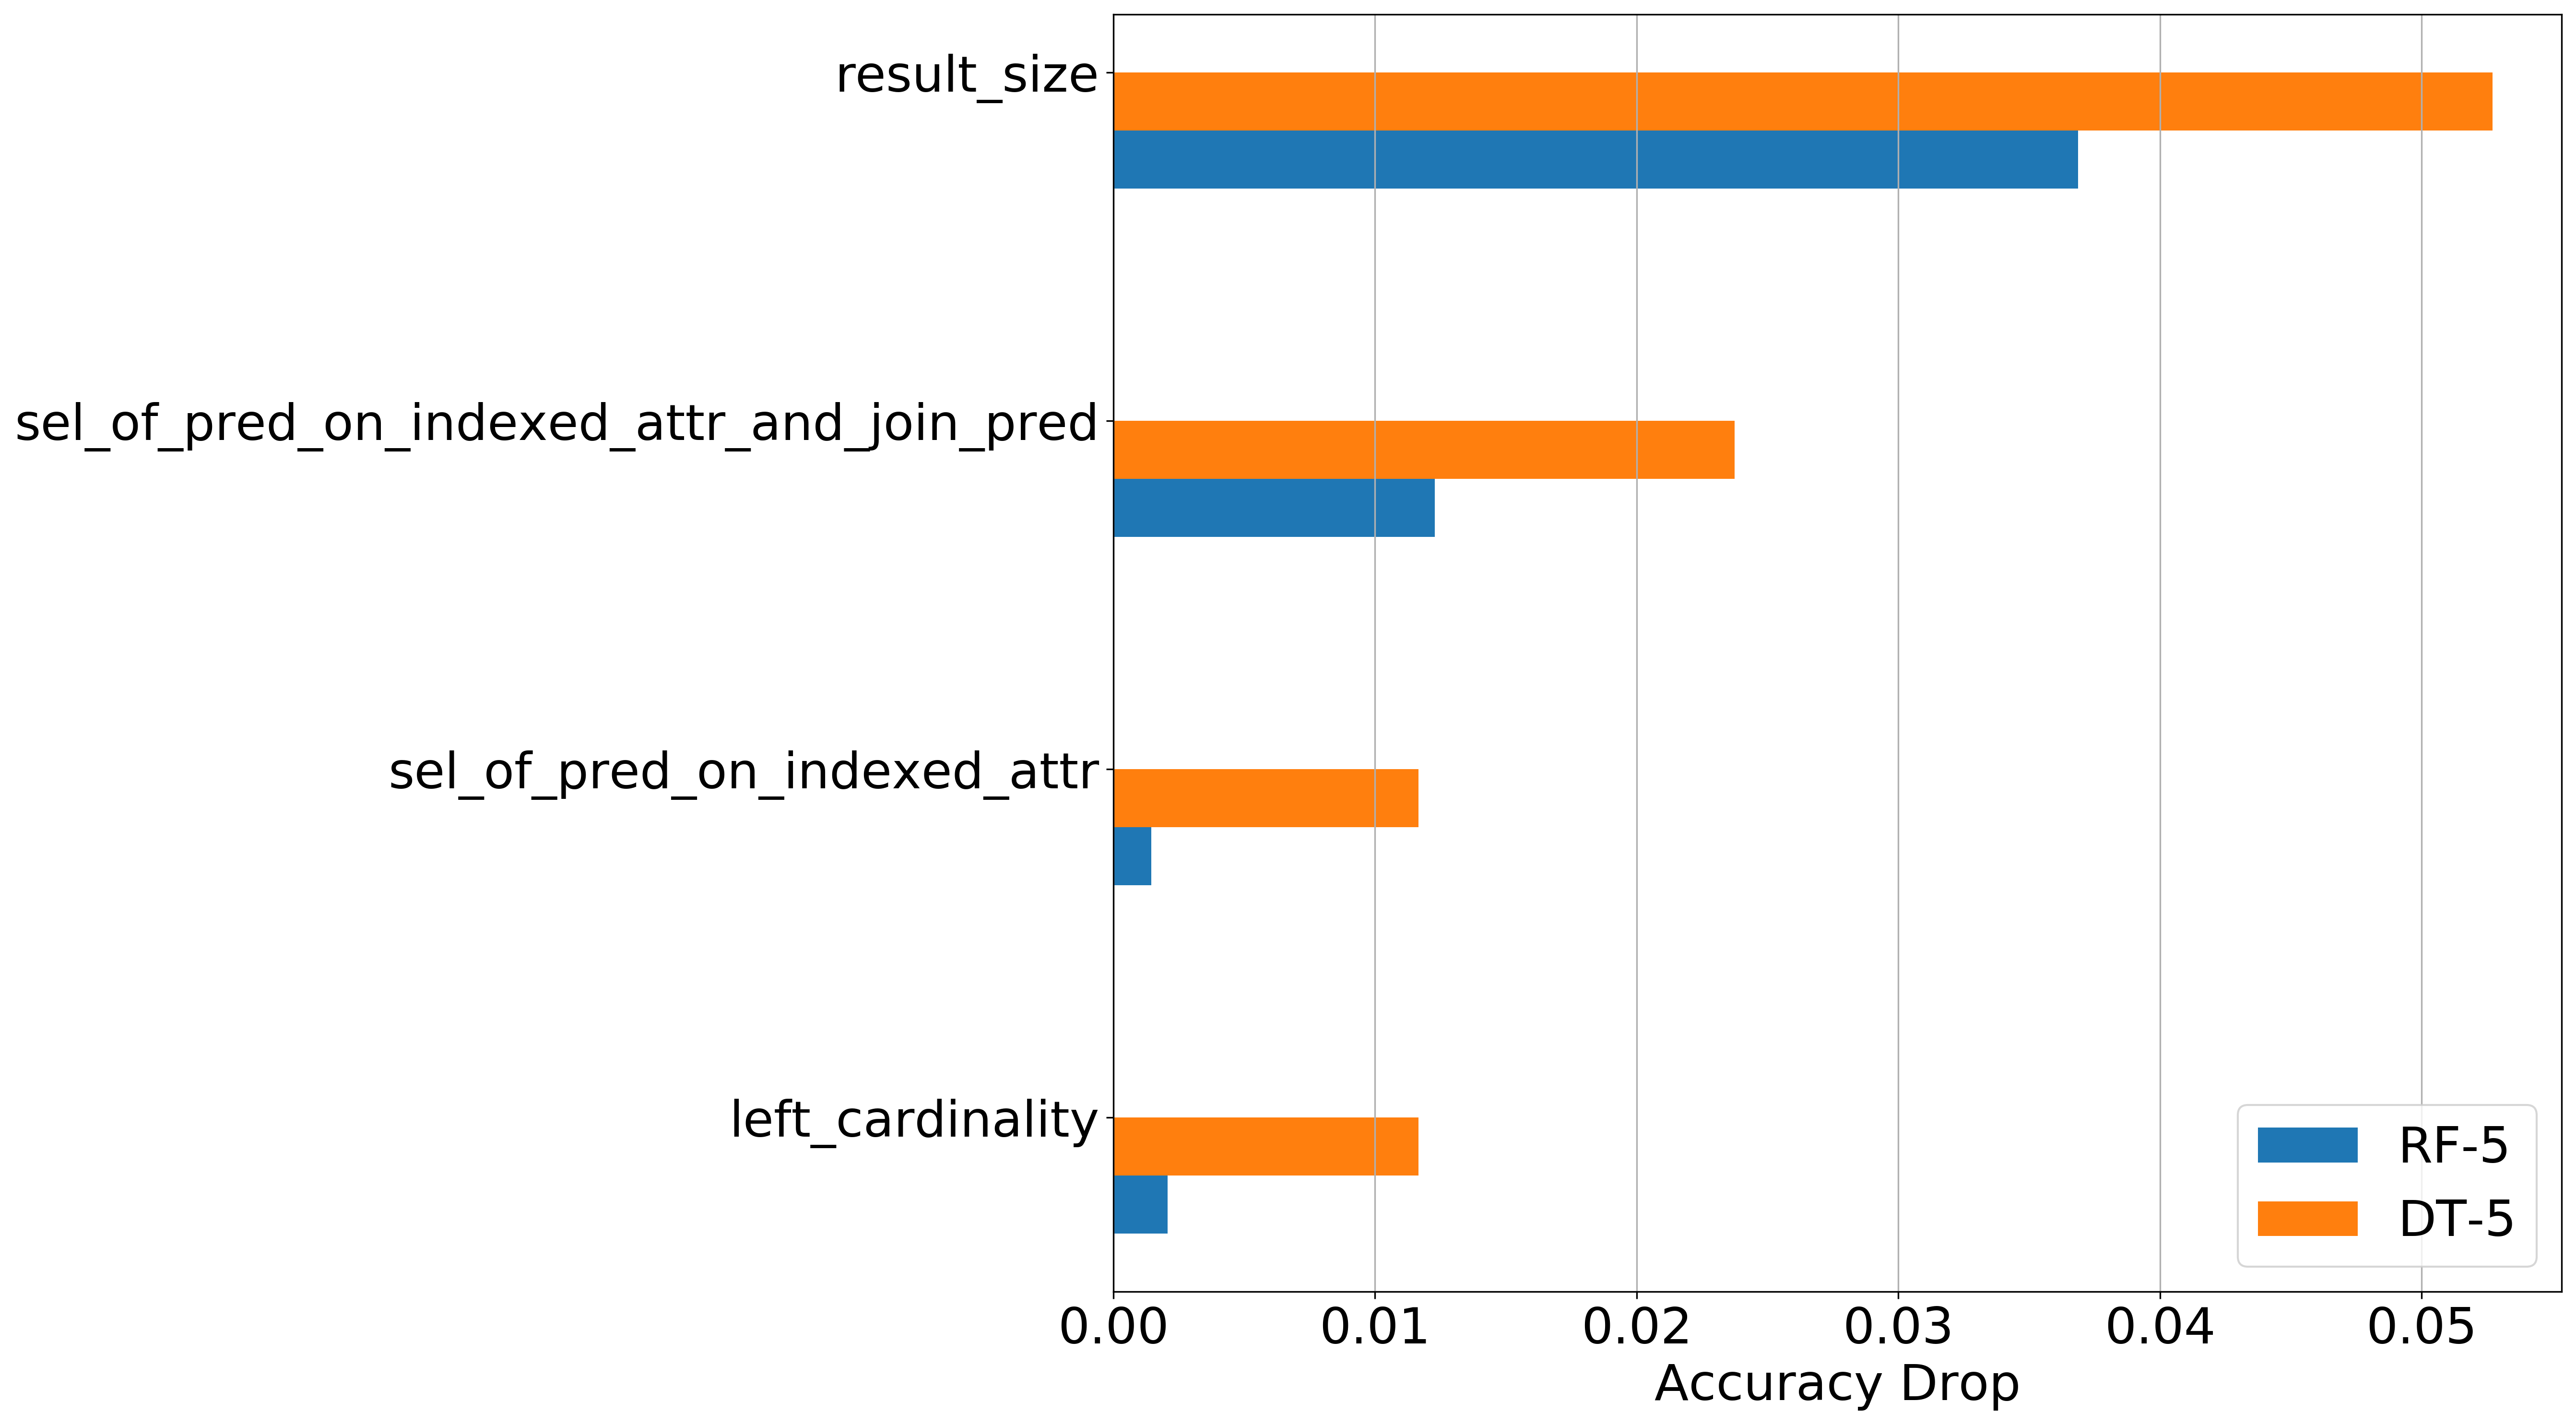

In [42]:
# mlp_drop = np.array(mlp_drop)
dt_drop = np.array(dt_drop)
rf_drop = np.array(rf_drop)

# mssql_imp = overall_imp[1]
# shap_values = shap_values / len(present_idxs)
# importances = np.array([feature_scores[f] for f in features])

# ===========================================
# indices = np.argsort(importances)
# ===========================================
barWidth = 0.5
# indices = [14,13,12,11,10,9,8,7,6,5,4,3,2,1,0]
indices = range(len(all_features))

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

plt.figure(figsize=(18, 10), dpi=300)

# plt.title('Feature Importances')
r1 = [i * 3 for i in range(len(all_features))]
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.barh(r1, rf_drop[indices], height=barWidth, color='tab:blue', align='center',  label='RF-5')
# plt.barh(r1 , mssql_imp[indices], height=barWidth , color='tab:orange', align='center', label='Microsoft SQL Server')
plt.barh(r2, dt_drop[indices], height=barWidth, color='tab:orange', align='center',  label='DT-5')
# plt.barh(r3, mlp_drop[indices], height=barWidth, color='tab:purple', align='center',  label='MLP')



plt.yticks([i + 1.5 * barWidth for i in r1], [all_features[i] for i in indices])
plt.xlabel('Accuracy Drop', fontsize=25)

axes = plt.gca()
axes.tick_params(axis='x', which='major', labelsize=25)
axes.tick_params(axis='y', which='major', labelsize=25)

plt.legend(loc='lower right', prop={'size': 25})

plt.grid(axis='x')
plt.tight_layout()
plt.savefig(f'./figures/exp2-mssql-ablation.pdf')
plt.show()

In [16]:
mlp_drop

array([], dtype=float64)

In [13]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [14]:
X_new = SelectKBest(chi2, k=2).fit_transform(X_train, y_train)

ValueError: Input X must be non-negative.